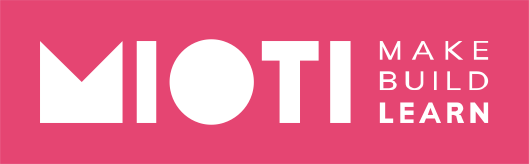
# EJERCICIOS TRABAJO EN EQUIPO
Los alumnos, por grupo, deberán entregar, una challenges por cada grupo. Se usará para su resolución Python.

*Nombre Equipo*:

Miembros del equipo:
>>

# Ejercicio 1
La siguiente tabla muestra información sobre la edad y la presión sanguínea de 10 mujeres:
edad:(56, 42, 72,  36, 63, 47, 55, 47, 38, 42)
presion:(148, 126, 159, 118, 149, 130, 151, 142, 114, 141)
Supongamos que nuestro objetivo es determinar la edad de una mujer a partir de su presión sanguínea o, lo que es lo mismo, supongamos que la variable dependiente es edad y que la variable independiente es presión. 
Representar el diagrama de dispersión de las dos variables para determinar si la relación existente entre ambas puede considerarse lineal, y por tanto, tiene sentido plantear un modelo de regresión lineal simple.


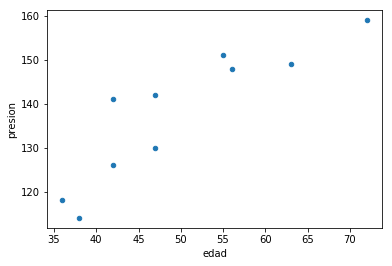

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import rcParams
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as smd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
data = {'edad':[56, 42, 72, 36, 63, 47, 55, 47, 38, 42],'presion':[148, 126, 159, 118, 149, 130, 151, 142, 114, 141]}
dataframe = pd.DataFrame.from_dict(data)
dataframe.plot("edad", "presion", kind="scatter")

Coefficients: 
 [0.67738772]
Independent term: 
 -43.54402824083154
Mean squared error: 26.37
Variance score: 0.78
Linea de mejor ajuste: Y = -43.54402824083154 + [0.67738772]*x


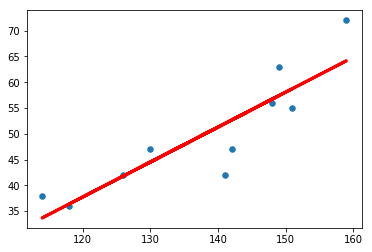

In [79]:
dataX =dataframe[["presion"]]
X_train = np.array(dataX)
Y_train = dataframe['edad'].values
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_train)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y_train, y_pred))
print('Variance score: %.2f' % r2_score(Y_train, y_pred))
plt.scatter(X_train[:,0], Y_train, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
print("Recta de mejor ajuste: Y = {0} + {1}*x".format(regr.intercept_,regr.coef_))

# Ejercicio 2
Con el conjunto de datos de *cars.csv* estudiar si hay relación lineal entre la variable dist y la variable speed. 
Construye el modelo lineal y muestra la función lineal resultante
¿Puedes hacer algún tipo de predicción? Comenta los resultados

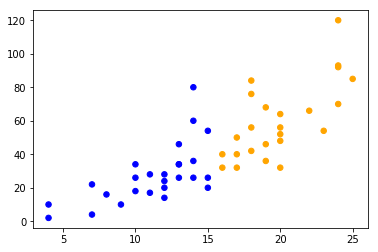

Coefficients: 
 [3.93240876]
Independent term: 
 -17.57909489051095
Mean squared error: 227.07
Variance score: 0.65


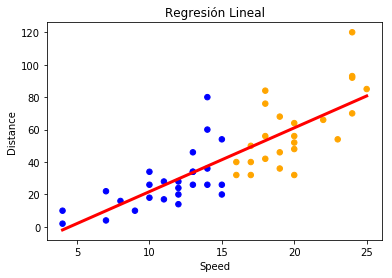

Recta de mejor ajuste: Y = -17.57909489051095 + [3.93240876]*x


In [113]:
df = pd.read_csv('cars.csv')
df_rename = df.rename(columns={';"speed";"dist"':"speed distance"})
new = df_rename["speed distance"].str.split(";", n = 2, expand = True)
final_data = new.rename(columns={0:'-',1:"Speed",2:"Distance"})
final_data['Speed'] = final_data['Speed'].astype(int)
final_data['Distance'] = final_data['Distance'].astype(int)

colores=['orange','blue']
tamanios=[30,60]

f1 = final_data['Speed'].values
f2 = final_data['Distance'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Velocidad
asignar=[]
for index, row in final_data.iterrows():
    if(row['Speed']>15):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()
final_data.describe()


# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =final_data[["Speed"]]
X_train = np.array(dataX)
Y_train = final_data['Distance'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, Y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y_train, y_pred))
plt.scatter(X_train[:,0], Y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Speed')
plt.ylabel('Distance')
plt.title('Regresión Lineal')

plt.show()
print("Recta de mejor ajuste: Y = {0} + {1}*x".format(regr.intercept_,regr.coef_))

Recta de mejor ajuste: Y = 8.283905641787177 + 0.16556757464431895*x


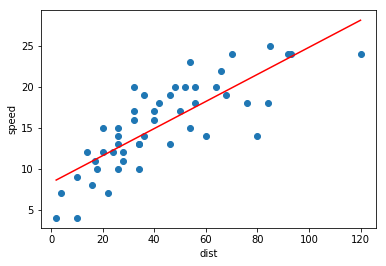

In [146]:
df2 = pd.read_csv('cars.csv', sep=';').set_index('Unnamed: 0')
dist = df2['dist'].values.reshape(-1, 1)
speed = df2['speed'].values.reshape(-1, 1)
x = sm.add_constant(dist)
y = speed
model = sm.OLS(y, x).fit()
model.summary()


B0, B1 = model.params
print("Recta de mejor ajuste: Y = {0} + {1}*x".format(B0,B1))

# Prediccion de valores -- desde x min hasta x max 100 valores
x = dist
x2 = np.linspace(x.min(), x.max(), 50)
y_pred = x2 * B1 + B0
x_real = 
y_real =
plt.scatter(x, y, alpha=1) #grafica el scatter plot
plt.plot(x2, y_pred, 'r', alpha=1) # la linea de regresion en rojo
plt.xlabel('dist')
plt.ylabel('speed')
plt.show()

stats.shapiro(data.Control.dropna())





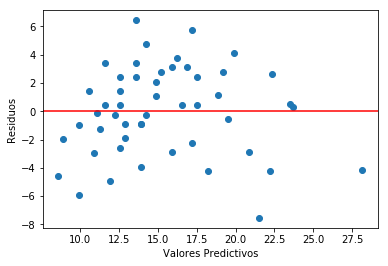

In [142]:
dist = df2['dist'].values.reshape(-1, 1)  # values converts it into a numpy array
speed = df2['speed'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

x = sm.add_constant(dist)
y_pred=model.predict(x)

plt.scatter(y_pred, model.resid)
plt.axhline(0, color='red')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuos')
plt.show()


# Ejercicio 3
Como responsable de una empresa, nos piden evaluar que máquina debemos comprar. Para ello nos dan 4 posibles opciones. 
Cada máquina la tenemos trabajando un numero de horas (variable x) y por cada registro de numero de horas trabajada nos da un valor (variable y) de metros cubicos de tierra que saca. 

Basándonos en los datos que tenemos. Saca una conclusión de que maquina (variable Group) es mejor. 
Para ello haz una regresión lineal por cada máquina (variable Group)

Datos de entrada: datos_ejercicio3.csv


In [147]:
df1 = pd.read_csv('datos_ejercicio3.csv')
df_rename1 = df1.rename(columns={'group;x;y':"group x y"})
new1 = df_rename1["group x y"].str.split(";", n = 3, expand = True)
final_data1 = new.rename(columns={0:'group',1:"Numero Horas",2:"Metros cubicos"})
final_data1['group'] = final_data1['group'].astype(int)
final_data1['Numero Horas'] = final_data1['Numero Horas'].astype(int)
final_data1['Metros cubicos'] = final_data1['Metros cubicos'].astype(int)

final_data1


dataX2 =  pd.DataFrame()
dataX2["Numero Horas"] = final_data1["Numero Horas"]
dataX2["Metros cubicos"] = final_data1["Metros cubicos"]
XY_train = np.array(dataX2)
z_train = final_data1['group'].values
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [2.57336933 0.03647103]
Mean squared error: 5.71
Variance score: 0.97
